# Spatial Hotspot Detection using Clustering
## Smart Civic Issue & Waste Management System

This notebook performs spatial hotspot detection on civic complaints using
density-based clustering techniques. The objective is to automatically
identify regions with concentrated civic issues that require focused
municipal intervention.

Important Notes:
- The analysis is purely spatial and does not assume temporal ordering.
- Density-based clustering is chosen to handle irregular spatial patterns.
- The output supports decision-making, not automated enforcement.

## 1. Importing Required Libraries

This section imports libraries required for spatial clustering,
data processing, and visualization.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

## 2. Loading Engineered Feature Dataset

The processed feature dataset generated during feature engineering is loaded.
This dataset contains spatial coordinates and auxiliary features.

In [6]:
df = pd.read_csv("data/processed/features_data.csv")
df.head()

,ID,category_encoded,status_encoded,density_score,category_frequency,is_pending,risk_signal,Latitude,Longitude
0,1,0,2,0.295490,214,1,0.577294,23.257167,77.413640
1,2,3,1,0.170649,497,0,0.102390,23.258523,77.415287
2,3,1,1,0.246742,425,0,0.148045,23.256676,77.411646
3,4,3,1,0.099254,497,0,0.059552,23.261520,77.407977
4,5,2,2,0.176402,311,1,0.505841,23.257405,77.412233


## 3. Selecting Spatial Features for Clustering

Clustering is performed using latitude and longitude coordinates only.
This avoids bias from non-spatial attributes and ensures geographic validity.

In [8]:
coords = df[['Latitude', 'Longitude']].values

## 4. Applying DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is used
to detect spatial clusters of complaints. It is well-suited for identifying
hotspots with arbitrary shapes and varying densities.

In [10]:
dbscan = DBSCAN(
    eps=0.002,      # spatial radius (tune if needed)
    min_samples=3   # minimum points to form a cluster
)

df['cluster_id'] = dbscan.fit_predict(coords)
df[['ID', 'cluster_id']].head()

,ID,cluster_id
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## 5. Cluster Distribution Analysis

This section examines how many complaints belong to each detected cluster.

In [12]:
df['cluster_id'].value_counts().sort_index()

cluster_id
-1     162
 0     411
 1     363
 2     310
 3     264
 4       3
 5       8
 6       3
 7       7
 8       3
 9       5
 10      4
 11      4
 12      3
 13      3
 14      3
 15      4
 16      3
 17      3
 18      5
 19      4
 20      6
 21      4
 22      3
 23      3
 24      3
 25      3
 26      3
Name: count, dtype: int64

## 6. Visualization of Spatial Hotspots

Clusters are visualized to validate spatial grouping and hotspot formation.

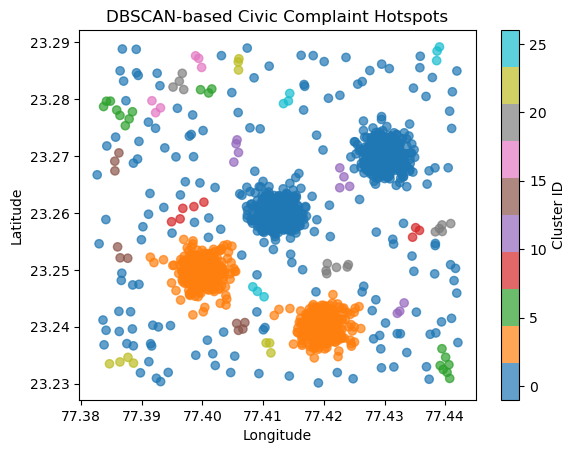

In [14]:
plt.scatter(
    df['Longitude'],
    df['Latitude'],
    c=df['cluster_id'],
    cmap='tab10',
    alpha=0.7
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN-based Civic Complaint Hotspots")
plt.colorbar(label="Cluster ID")
plt.show()

## 7. Hotspot Summary Statistics

This section summarizes each detected cluster in terms of complaint count
and average risk indicators.

In [17]:
hotspot_summary = df.groupby('cluster_id').agg(
    complaint_count=('ID', 'count'),
    avg_density_score=('density_score', 'mean'),
    pending_ratio=('is_pending', 'mean')
).reset_index()

hotspot_summary

,cluster_id,complaint_count,avg_density_score,pending_ratio
0,-1,162,0.012654,0.524691
1,0,411,0.265841,0.469586
2,1,363,0.255867,0.465565
3,2,310,0.231999,0.496774
4,3,264,0.209608,0.450758
5,4,3,0.022517,1.000000
6,5,8,0.029561,0.500000
7,6,3,0.018010,0.666667
8,7,7,0.038061,0.428571
9,8,3,0.024339,0.000000


## 8. Hotspot Risk Level Assignment

Each hotspot is assigned a qualitative risk level based on its characteristics.

In [19]:
def hotspot_risk(row):
    if row['complaint_count'] >= 5 or row['avg_density_score'] >= 0.7:
        return "HIGH"
    elif row['complaint_count'] >= 3:
        return "MEDIUM"
    else:
        return "LOW"

hotspot_summary['hotspot_risk_level'] = hotspot_summary.apply(
    hotspot_risk, axis=1
)

hotspot_summary

,cluster_id,complaint_count,avg_density_score,pending_ratio,hotspot_risk_level
0,-1,162,0.012654,0.524691,HIGH
1,0,411,0.265841,0.469586,HIGH
2,1,363,0.255867,0.465565,HIGH
3,2,310,0.231999,0.496774,HIGH
4,3,264,0.209608,0.450758,HIGH
5,4,3,0.022517,1.000000,MEDIUM
6,5,8,0.029561,0.500000,HIGH
7,6,3,0.018010,0.666667,MEDIUM
8,7,7,0.038061,0.428571,HIGH
9,8,3,0.024339,0.000000,MEDIUM


## 9. Merging Hotspot Information with Complaint Records

Hotspot-level risk information is merged back into individual complaint records
for integrated analysis and dashboard use.

In [21]:
df = df.merge(
    hotspot_summary[['cluster_id', 'hotspot_risk_level']],
    on='cluster_id',
    how='left'
)

df[['ID', 'cluster_id', 'hotspot_risk_level']].head()

,ID,cluster_id,hotspot_risk_level
0,1,0,HIGH
1,2,0,HIGH
2,3,0,HIGH
3,4,0,HIGH
4,5,0,HIGH


## 10. Saving Hotspot Clustering Results

The final dataset with hotspot assignments is saved for reporting and
dashboard integration.

In [23]:
output_cols = [
    'ID',
    'Latitude',
    'Longitude',
    'cluster_id',
    'hotspot_risk_level'
]

df[output_cols].to_csv(
    "data/processed/hotspot_results.csv",
    index=False
)

hotspot_summary.to_csv(
    "data/processed/hotspot_summary.csv",
    index=False
)

print("Hotspot clustering results saved successfully.")

Hotspot clustering results saved successfully.


## 11. Summary of Hotspot Detection

### Key Outcomes:
- Density-based clustering automatically identified civic complaint hotspots.
- Noise points represent isolated, low-priority cases.
- Hotspot risk levels enable zone-wise prioritization.

### Practical Impact:
- Supports targeted municipal interventions
- Reduces manual hotspot identification
- Complements priority classification model

This completes the machine learning pipeline for the project.